# Linear Regression Bit Coin Price Presdiction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\saipr\\Downloads\\dataset.csv")


In [4]:
df

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984
...,...,...,...,...,...
1880,2023-03-27,64.0,Greed,27139.888672,18188895178
1881,2023-03-28,59.0,Greed,27268.130859,17783600385
1882,2023-03-29,57.0,Greed,28348.441406,20684945906
1883,2023-03-30,60.0,Greed,28033.562500,22435349951


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1885 non-null   object 
 1   Value                 1882 non-null   float64
 2   Value_Classification  1882 non-null   object 
 3   BTC_Closing           1885 non-null   float64
 4   BTC_Volume            1885 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 73.8+ KB


In [6]:
df.shape

(1885, 5)

In [7]:
df.describe()

,Value,BTC_Closing,BTC_Volume
count,1882.000000,1885.000000,1.885000e+03
mean,42.394261,20579.140472,2.676660e+10
std,22.087394,16710.842873,1.953785e+10
min,5.000000,3236.761719,2.923670e+09
25%,24.000000,7879.071289,1.373184e+10
50%,39.000000,11429.506836,2.459894e+10
75%,56.000000,32702.025391,3.569001e+10
max,95.000000,67566.828125,3.509679e+11


In [8]:
df.isnull().sum()

Date                    0
Value                   3
Value_Classification    3
BTC_Closing             0
BTC_Volume              0
dtype: int64

In [9]:
#Removing rows that containing null values
df=df.dropna()
df

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984
...,...,...,...,...,...
1880,2023-03-27,64.0,Greed,27139.888672,18188895178
1881,2023-03-28,59.0,Greed,27268.130859,17783600385
1882,2023-03-29,57.0,Greed,28348.441406,20684945906
1883,2023-03-30,60.0,Greed,28033.562500,22435349951


<Axes: xlabel='Value_Classification', ylabel='count'>

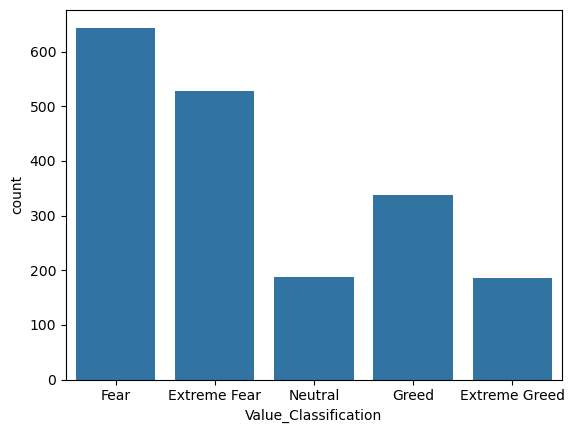

In [10]:
sns.countplot(data=df,x='Value_Classification')

<Axes: xlabel='Value_Classification', ylabel='BTC_Closing'>

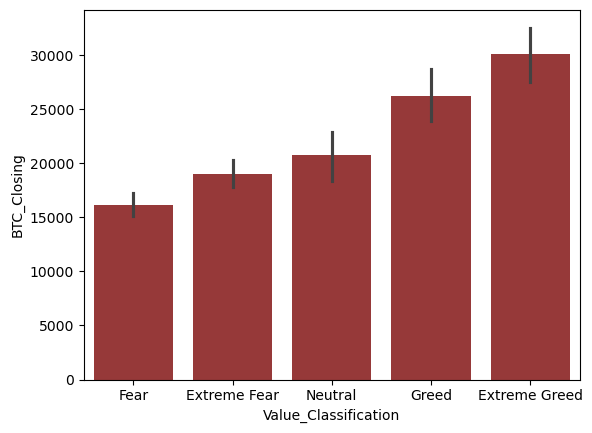

In [11]:
sns.barplot(data=df,x='Value_Classification',y='BTC_Closing',color='brown')

# Training and Testing Data

In [12]:
X=df[['Value','BTC_Volume']]
y=df['BTC_Closing']

In [13]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Train the model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

# Predicting test data

In [18]:
prediction = lm.predict(X_test)

In [19]:
prediction

array([20322.37012051, 19932.75126188, 22942.87963269, 24234.46741644,
       27086.37183373, 13600.39660023, 10986.53636617, 28593.99704132,
       18140.1771373 , 20909.52397442, 29140.77843582, 26517.08306831,
       20798.82928481, 14203.16475116, 30601.55294515, 21259.27035014,
       16891.05787645, 53435.50324911, 19619.78913358, 19663.94168154,
       30993.08689273, 24807.08672654, 26348.59536379, 27819.44365816,
        9719.73447509, 22393.31674334,  9536.20091671, 22985.27178402,
       10666.08011327,  9658.74459654, 32564.39876561, 15802.67189423,
       20792.60024391, 17826.93043746, 30187.91761853, 16026.74069425,
       18578.58240294, 11977.64389976,  9848.03087023, 21600.84297289,
       15715.9135571 , 40175.4026212 , 19206.37587636, 12964.57637501,
        9123.22206897, 15270.27957615, 51962.33309171, 16932.9317197 ,
       17033.47217497, 22655.0906038 , 28999.15922392, 15048.538202  ,
       20470.84447932, 15425.816459  , 27942.19390305, 41296.64585409,
      

In [20]:
#orginal values
y_test

1522    46453.566406
1250    33746.003906
801      6971.091797
759      8562.454102
713      8807.010742
            ...     
280      6453.720215
1741    18541.271484
361      3470.450439
1877    27493.285156
239      6644.129883
Name: BTC_Closing, Length: 565, dtype: float64

# Evaluating the Model

In [21]:
from sklearn import metrics

In [22]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))

MAE: 10700.220128608074


In [23]:
print('MSE:',metrics.mean_squared_error(y_test,prediction))

MSE: 186604855.43996057


# Residuals

Text(0, 0.5, 'X Test(Predicted Values)')

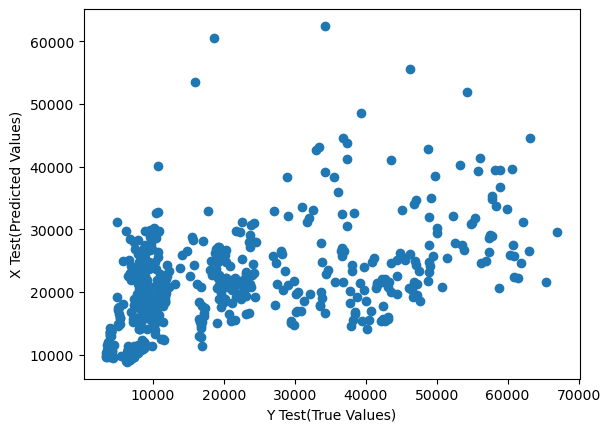

In [24]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test(True Values)')
plt.ylabel('X Test(Predicted Values)')

C:\Users\saipr\AppData\Local\Temp\ipykernel_6896\1219987323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50);


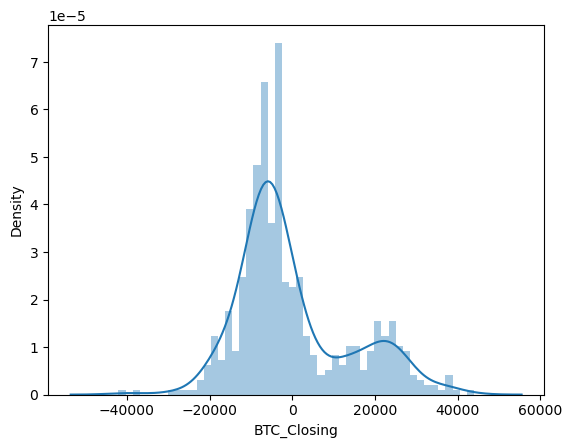

In [25]:
sns.distplot((y_test-prediction),bins=50);